In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=20,
    skipfooter=2)
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df['Total'] = df.sum(numeric_only=True, axis=1)
df.set_index('Country', inplace=True)
df.index.name = None
df.columns = df.columns.astype("str")
df.head()

Continent           Region             DevName  1980  1981  \
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [7]:
df.describe()

1980          1981          1982          1983          1984  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean     508.394872    566.989744    534.723077    387.435897    376.497436   
std     1949.588546   2152.643752   1866.997511   1204.333597   1198.246371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       13.000000     10.000000     11.000000     12.000000     13.000000   
75%      251.500000    295.500000    275.000000    173.000000    181.000000   
max    22045.000000  24796.000000  20620.000000  10015.000000  10170.000000   

              1985         1986          1987          1988          1989  \
count   195.000000   195.000000    195.000000    195.000000    195.000000   
mean    358.861538   441.271795    691.133333    714.389744    843.241026   
std    1079.309600  1225.576630   2109.205607   2443.606788   2555.048874   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.500000      0.500000      1.000000      1.000000   
50%      17.000000    18.000000     26.000000     34.000000     44.000000   
75%     197.000000   254.000000    434.000000    409.000000    508.500000   
max    9564.000000  9470.000000  21337.000000  27359.000000  23795.000000   

       ...          2005          2006          2007          2008  \
count  ...    195.000000    195.000000    195.000000    195.000000   
mean   ...   1320.292308   1266.958974   1191.820513   1246.394872   
std    ...   4425.957828   3926.717747   3443.542409   3694.573544   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     28.500000     25.000000     31.000000     31.000000   
50%    ...    210.000000    218.000000    198.000000    205.000000   
75%    ...    832.000000    842.000000    899.000000    934.500000   
max    ...  42584.000000  33848.000000  28742.000000  30037.000000   

               2009          2010          2011          2012          2013  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean    1275.733333   1420.287179   1262.533333   1313.958974   1320.702564   
std     3829.630424   4462.946328   4030.084313   4247.555161   4237.951988   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       36.000000     40.500000     37.500000     42.500000     45.000000   
50%      214.000000    211.000000    179.000000    233.000000    213.000000   
75%      888.000000    932.000000    772.000000    783.000000    796.000000   
max    29622.000000  38617.000000  36765.000000  34315.000000  34129.000000   

               Total  
count     195.000000  
mean    32867.451282  
std     91785.498686  
min         1.000000  
25%       952.000000  
50%      5018.000000  
75%     22239.500000  
max    691904.000000  

[8 rows x 35 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  195 non-null    object
 1   Region     195 non-null    object
 2   DevName    195 non-null    object
 3   1980       195 non-null    int64 
 4   1981       195 non-null    int64 
 5   1982       195 non-null    int64 
 6   1983       195 non-null    int64 
 7   1984       195 non-null    int64 
 8   1985       195 non-null    int64 
 9   1986       195 non-null    int64 
 10  1987       195 non-null    int64 
 11  1988       195 non-null    int64 
 12  1989       195 non-null    int64 
 13  1990       195 non-null    int64 
 14  1991       195 non-null    int64 
 15  1992       195 non-null    int64 
 16  1993       195 non-null    int64 
 17  1994       195 non-null    int64 
 18  1995       195 non-null    int64 
 19  1996       195 non-null    int64 
 20  1997       195 non-nul

In [9]:
f = df[["Continent", "Total"]].groupby("Continent", as_index=False).sum()
f

Continent    Total
0                           Africa   618948
1                             Asia  3317794
2                           Europe  1410947
3  Latin America and the Caribbean   765148
4                 Northern America   241142
5                          Oceania    55174

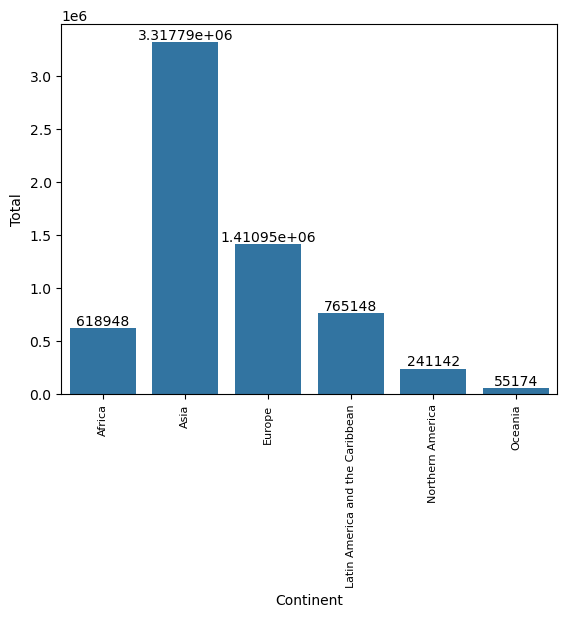

In [10]:
ax = sns.barplot(x=f["Continent"], y=f["Total"])
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.show()

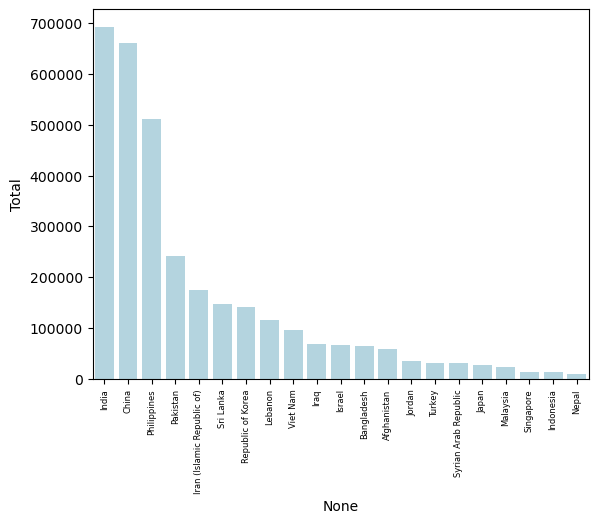

In [11]:
df_asia = df.loc[(df["Continent"]=="Asia")&(df["Total"]>10000)].sort_values(by="Total", ascending=False)
sns.barplot(x=df_asia.index, y=df_asia["Total"], color="lightblue")
plt.xticks(rotation=90, fontsize=6)
plt.show()

## LinePlot

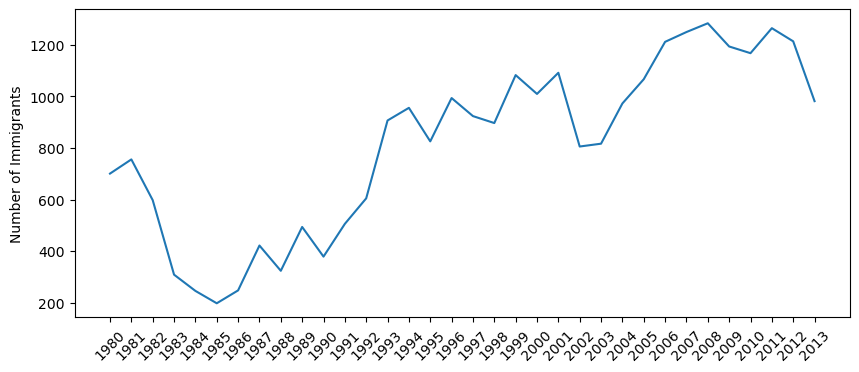

In [13]:
years= years = list(map(str, range(1980, 2014)))
plt.figure(figsize=(10,4))
sns.lineplot(x=years, y=df.loc["Japan"][years])
plt.xticks(rotation=45)
plt.ylabel("Number of Immigrants")
plt.show()

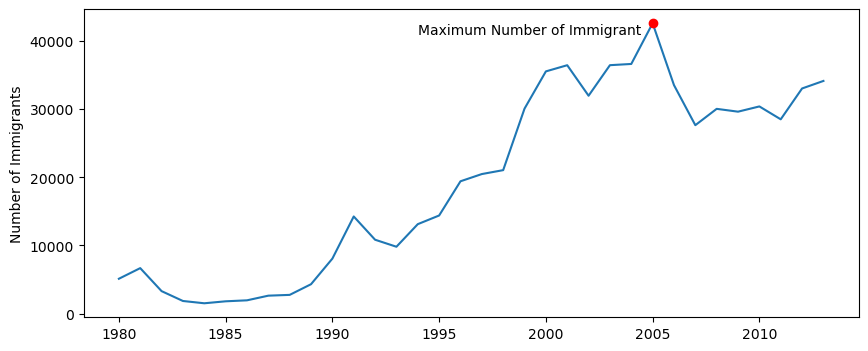

In [14]:
plt.figure(figsize=(10,4))
df.loc["China"][years].plot(kind="line")
plt.ylabel("Number of Immigrants")
plt.text(14, 41000, 'Maximum Number of Immigrant')
plt.plot(25, 42584, "ro", label="Marker")
plt.show()

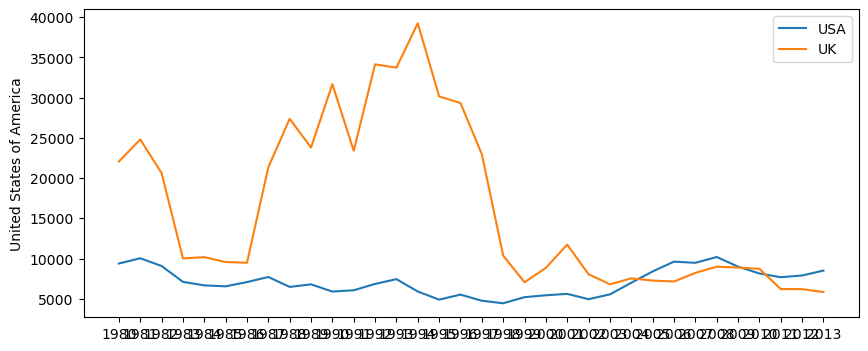

In [15]:
plt.figure(figsize=(10,4))
ax1 = sns.lineplot(x=years, y=df.loc["United States of America"][years], label="USA")
sns.lineplot(x=years, y=df.loc["United Kingdom of Great Britain and Northern Ireland"][years], ax=ax1, label="UK")
ax1.legend()

<Axes: >

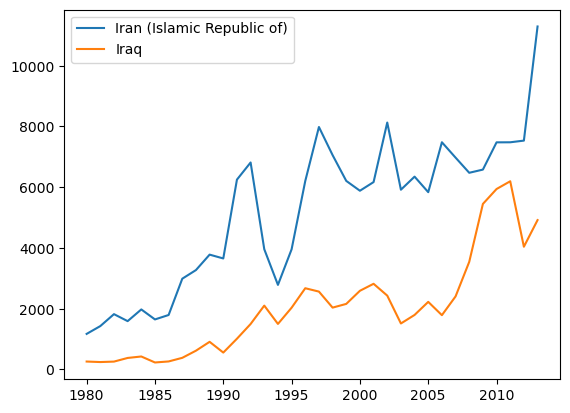

In [16]:
df.loc[["Iran (Islamic Republic of)", "Iraq"]][years].T.plot(kind="line")

## Area Plot

In [18]:
df_top_euro = df[years][(df["Continent"]=="Europe")&(df["Total"]>70000)].T
df_top_euro.head(2)

France  Poland  Portugal  Romania  \
1980    1729     863      4473      375   
1981    2027    2930      3486      438   

      United Kingdom of Great Britain and Northern Ireland  
1980                                              22045     
1981                                              24796

<Axes: >

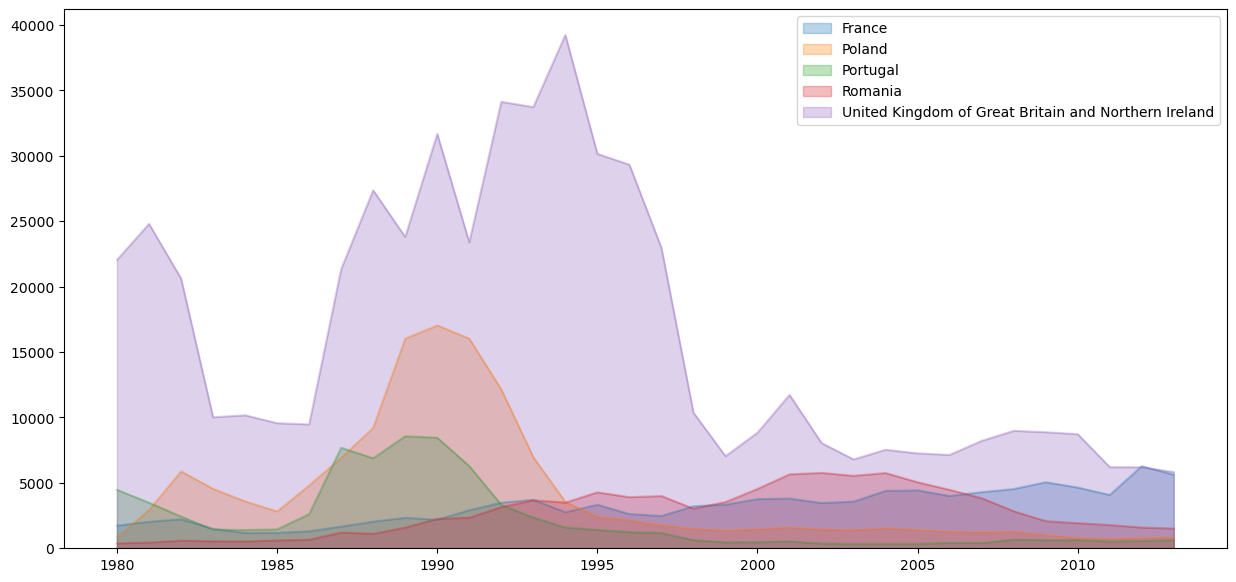

In [19]:
df_top_euro.plot(kind="area", alpha=0.3, stacked=False, figsize=(15,7))

## Histogram

In [21]:
count_country, edge_population = np.histogram(df["1980"])
print(count_country, edge_population.tolist(), sep = "\n")

[187   2   3   0   2   0   0   0   0   1]
[0.0, 2204.5, 4409.0, 6613.5, 8818.0, 11022.5, 13227.0, 15431.5, 17636.0, 19840.5, 22045.0]


<Axes: ylabel='Frequency'>

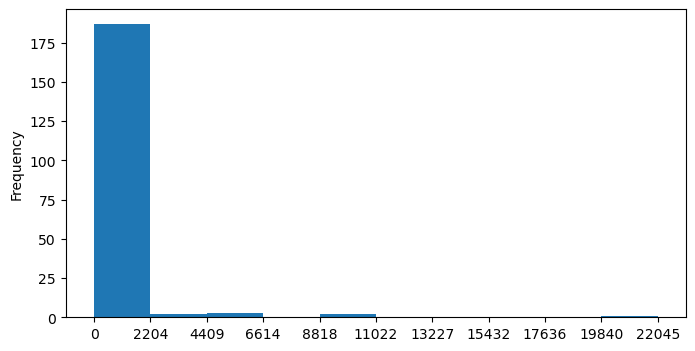

In [22]:
df["1980"].plot(kind="hist", xticks= edge_population, figsize=(8,4))

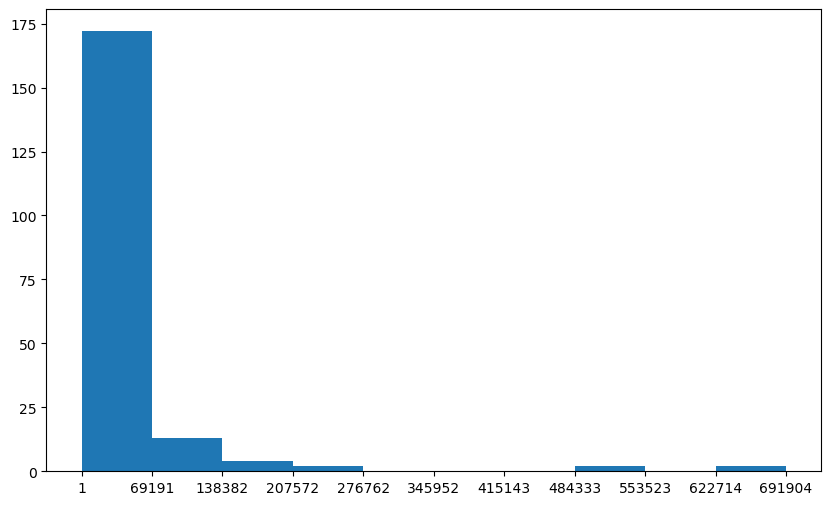

In [23]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df["Total"], bins=10)
plt.xticks(bins)
plt.show()

<Axes: ylabel='Frequency'>

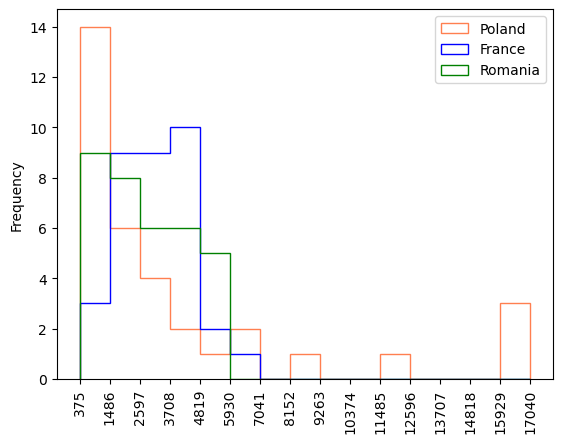

In [24]:
df_euro2 = df.loc[["Poland", "France", "Romania"]][years].T
c, ed = np.histogram(df_euro2, 15)
df_euro2.plot(kind="hist", bins=15, histtype="step", xticks=ed, rot=90, color=['coral', 'blue', 'green'])

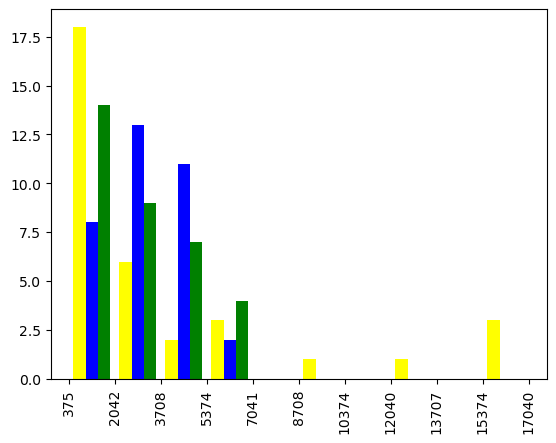

In [25]:
n, bins, patches = plt.hist(df_euro2, color=['yellow', 'blue', 'green'])
plt.xticks(bins, rotation=90)
plt.show()

## Bar Plot

Text(0, 500, '')

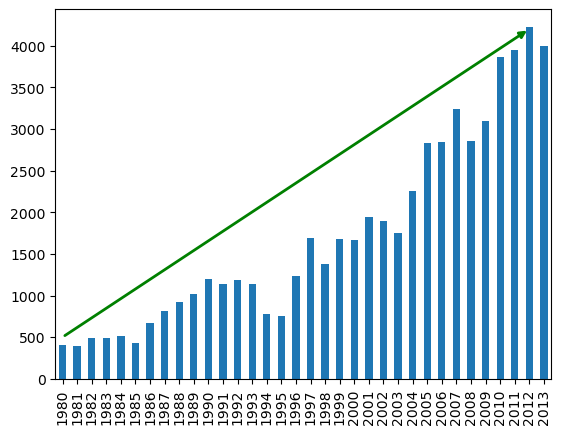

In [26]:
df_latin = df.loc["Mexico"][years]
df_latin.plot(kind="bar", legend=False)

plt.annotate('', xy= (32, 4200), xytext= (0,500), xycoords='data',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', color='green', lw=2))

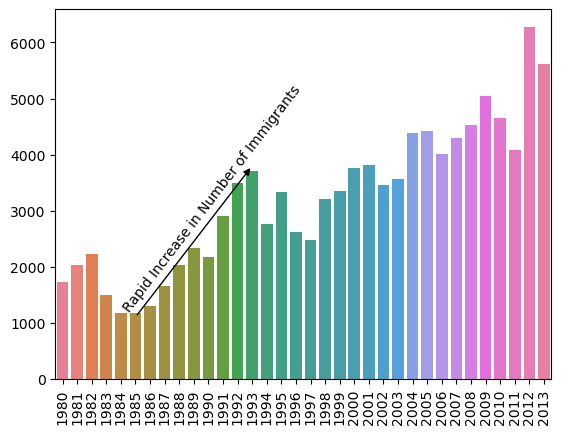

In [27]:
sns.barplot(df[years][df.index=="France"])
plt.xticks(rotation=90)
plt.annotate("", xy=(5,1100), xytext=(13,3800), xycoords='data',
            arrowprops=dict(arrowstyle="<|-", connectionstyle="arc3", color="black"))
plt.annotate("Rapid Increase in Number of Immigrants", xy=(4, 1200), rotation=52.5)

plt.show()

<Axes: >

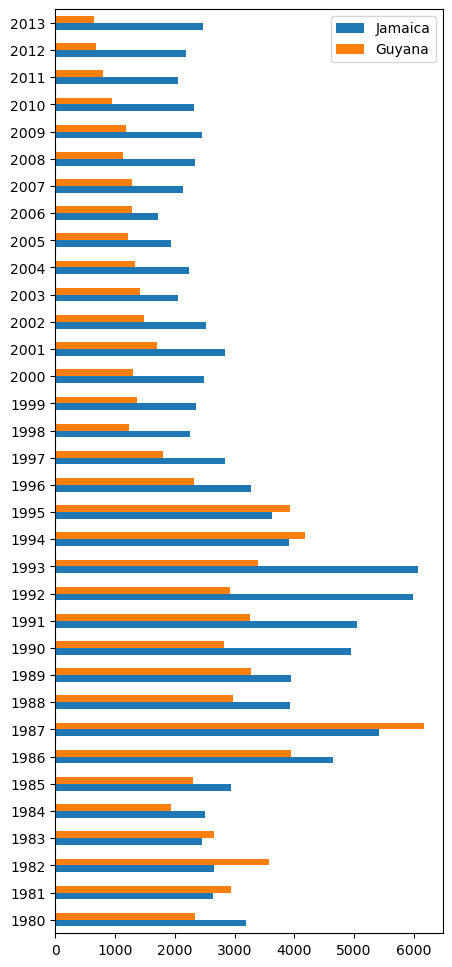

In [28]:
df.loc[["Jamaica", "Guyana"]][years].T.plot(kind="barh", figsize=(5,12))

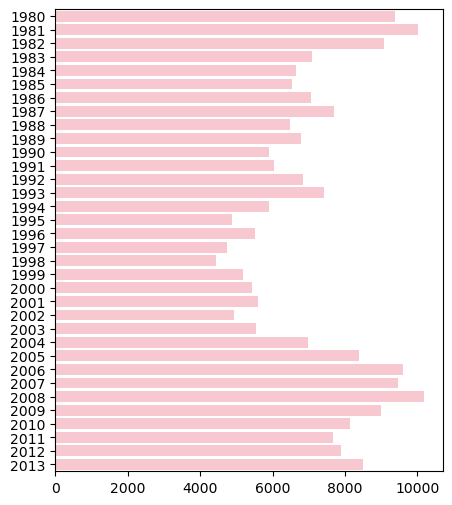

In [29]:
plt.figure(figsize=(5,6))
sns.barplot(df[df.index=="United States of America"][years], orient="h", color="pink")
plt.show()

<Axes: >

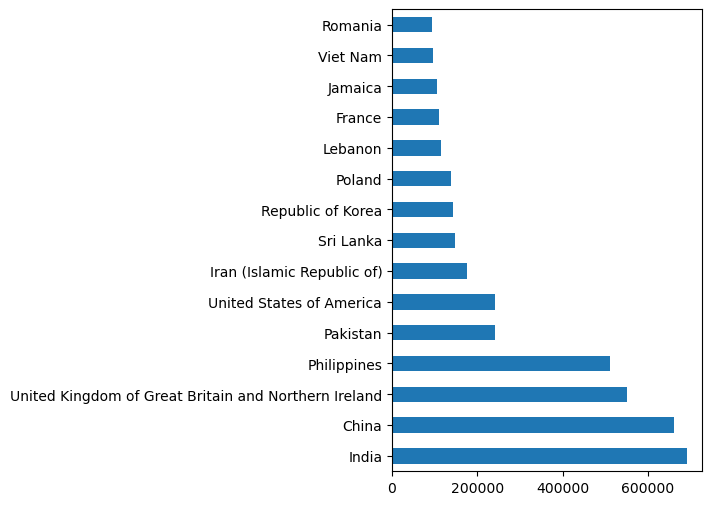

In [30]:
df["Total"].sort_values(ascending=False).head(15).plot(kind="barh", figsize=(4,6))

## Tree Map

In [31]:
df_asia.reset_index(inplace=True)
df_asia.head(1)

index Continent         Region             DevName  1980  1981  1982  1983  \
0  India      Asia  Southern Asia  Developing regions  8880  8670  8147  7338   

   1984  1985  ...   2005   2006   2007   2008   2009   2010   2011   2012  \
0  5704  4211  ...  36210  33848  28742  28261  29456  34235  27509  30933   

    2013   Total  
0  33087  691904  

[1 rows x 39 columns]

In [32]:
fig = px.treemap(df,
                path= ["Continent", "Region"],
                values= "Total",
                title= "Immigrants from all over the world")
#fig.show()

In [33]:
fig = px.treemap(df_asia,
                 path=["Region", "index"],
                 values="Total",
                 title="Asian Immigrants")

# fig.show()

## Pivot Table

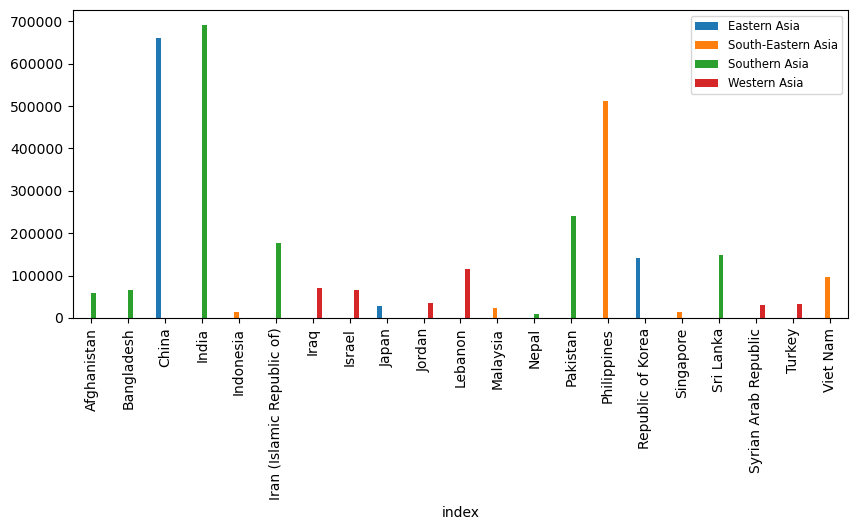

In [200]:
pivot= df_asia.pivot_table(values="Total", index="index", columns=["Region"], aggfunc="sum")
pivot.plot(kind="bar", figsize=(10,4))
plt.legend(fontsize="smaller")

## Pie Plot

In [35]:
df_cont = df[["Continent", "Total"]].groupby("Continent", as_index=True).sum()
df_cont['Total']

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

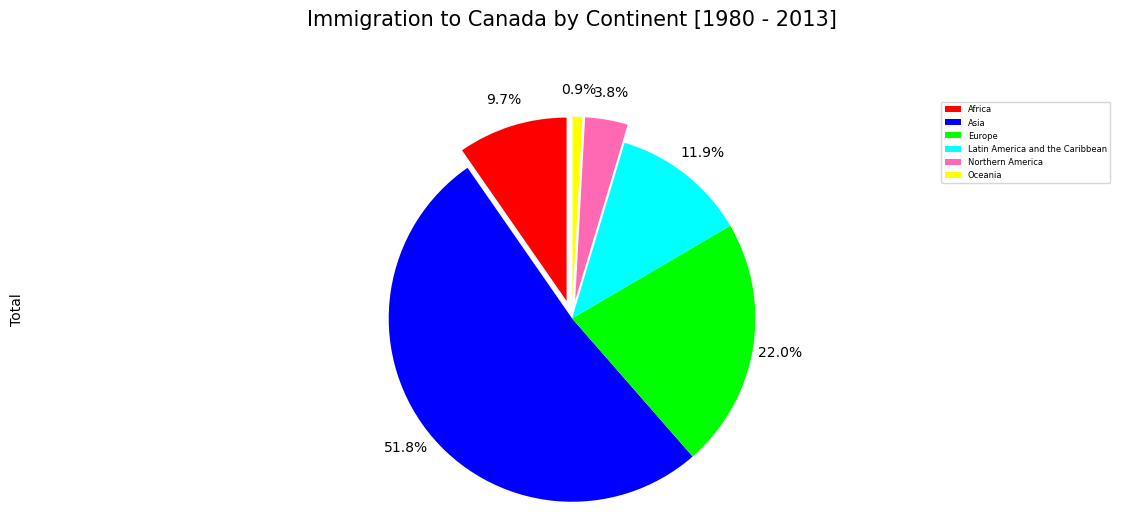

In [36]:
df_cont["Total"].plot(kind="pie", figsize=(14,5.5),
      autopct='%1.1f%%',
      pctdistance=1.15,
      startangle=90,
      shadow=False,
      labels=None,
      colors=["red", "blue", "lime", "cyan", "hotpink", "yellow"],
      explode=[0.1,0,0,0,0.1,0.1],
      )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.15,x=0.5, fontsize = 15) 
plt.axis("equal")
plt.legend(labels=df_cont.index, loc='upper right', fontsize=6) 


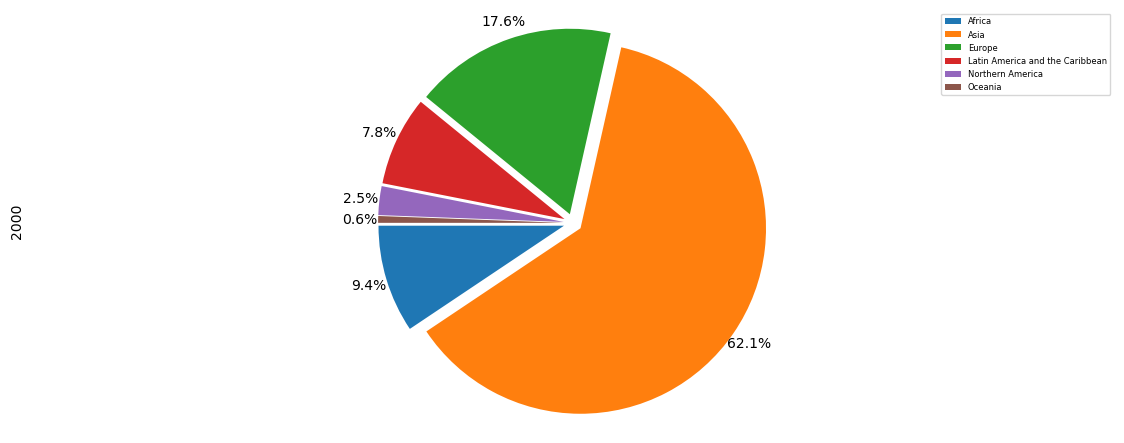

In [37]:
df_2000 = df[["Continent", "2000"]].groupby("Continent", as_index=False).sum()
df_2000["2000"].plot(kind="pie", figsize=(14,5.5),
             autopct='%1.1f%%',
             pctdistance=1.1,
             labels=None,
             shadow=False,
             startangle=180,
             explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

plt.axis("equal")
plt.legend(labels=df_2000["Continent"], fontsize=6, loc="upper right")

## Box Plot

Text(0, 0.5, 'Number of Immigrants')

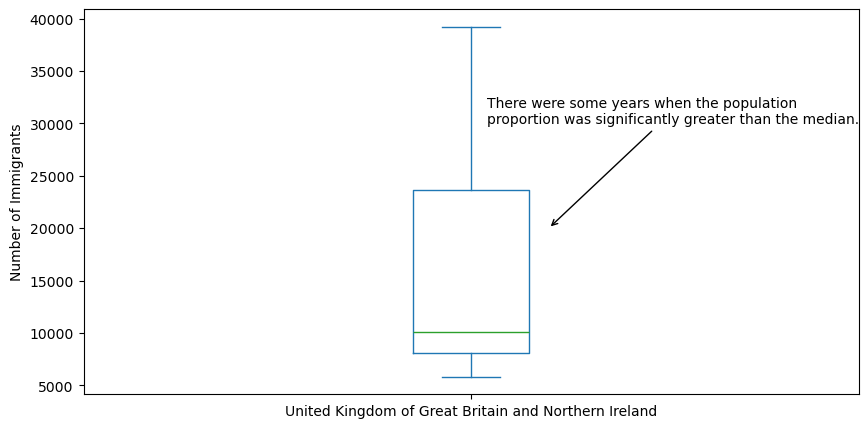

In [39]:
df_UK = df.loc['United Kingdom of Great Britain and Northern Ireland'][years].T
df_UK.plot(kind="box", figsize=(10,5))
plt.annotate("There were some years when the population\nproportion was significantly greater than the median.",
            color= "black",
            xy=(1.1, 20000),
            xytext= (1.02, 30000),
            xycoords="data",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="black"))

plt.ylabel("Number of Immigrants")

Text(0.5, 0, 'Number of Immigrants')

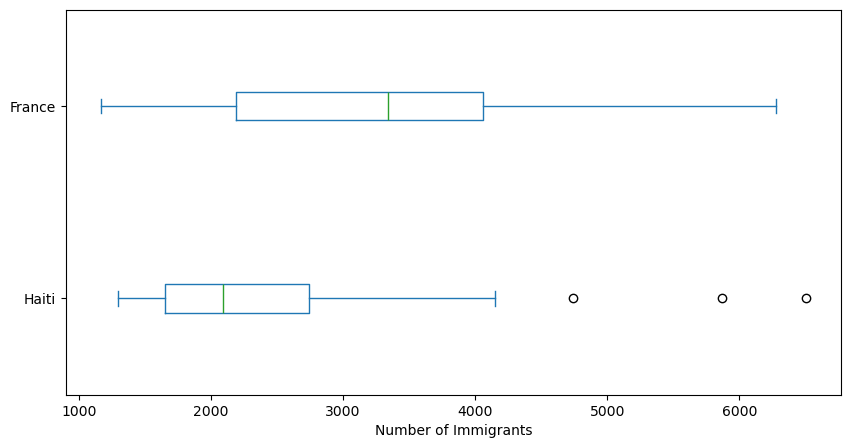

In [40]:
df_HF = df.loc[['Haiti', 'France']][years].T
df_HF.plot(kind="box", vert=False, figsize=(10,5))
plt.xlabel("Number of Immigrants")

In [116]:
df15 = df.sort_values("Total", ascending=False).head(15)

T80 = list(map(str, range(1980,1990)))
T90 = list(map(str, range(1990,2000)))
T00 = list(map(str, range(2000,2014)))

df15["t80s"] = df15[T80].sum(numeric_only=True, axis=1)
df15["t90s"] = df15[T90].sum(numeric_only=True, axis=1)
df15["t00s"] = df15[T00].sum(numeric_only=True, axis=1)

df15.describe()

1980          1981          1982          1983          1984  \
count     15.000000     15.000000     15.000000     15.000000     15.000000   
mean    4239.200000   4753.600000   4396.533333   3191.666667   3271.066667   
std     5775.397354   6330.387709   5228.449618   2952.090075   2960.972463   
min      185.000000    371.000000    290.000000    197.000000    524.000000   
25%      994.500000   1274.000000   1386.500000    990.500000   1127.500000   
50%     1409.000000   2027.000000   2219.000000   1863.000000   1977.000000   
75%     5587.000000   6301.500000   5565.000000   4554.000000   4752.500000   
max    22045.000000  24796.000000  20620.000000  10015.000000  10170.000000   

              1985         1986          1987          1988          1989  \
count    15.000000    15.000000     15.000000     15.000000     15.000000   
mean   2958.733333  3471.933333   5366.333333   5906.533333   6862.733333   
std    2599.391892  2682.678605   5216.471983   6726.827525   6260.659122   
min     514.000000   656.000000   1072.000000   1106.000000   1582.000000   
25%    1069.500000  1546.000000   1998.000000   2398.000000   2868.500000   
50%    1816.000000  2576.000000   3803.000000   3273.000000   3946.000000   
75%    3680.500000  4728.500000   7145.500000   7554.000000   8750.000000   
max    9564.000000  9470.000000  21337.000000  27359.000000  23795.000000   

       ...          2008          2009          2010          2011  \
count  ...     15.000000     15.000000     15.000000     15.000000   
mean   ...   9746.200000   9705.600000  10627.600000   9528.666667   
std    ...   9747.086255  10384.984716  12633.541144  11454.639220   
min    ...   1267.000000   1013.000000    795.000000    720.000000   
25%    ...   3201.500000   2766.500000   2876.500000   2565.500000   
50%    ...   6475.000000   5874.000000   5537.000000   4588.000000   
75%    ...   9592.000000   8935.500000   8433.000000   7577.500000   
max    ...  30037.000000  29622.000000  38617.000000  36765.000000   

               2012          2013          Total           t80s  \
count     15.000000     15.000000      15.000000      15.000000   
mean   10263.133333  10442.333333  268346.266667   44418.333333   
std    12014.157897  11848.178122  217736.174584   44190.676455   
min      779.000000    852.000000   93585.000000    7613.000000   
25%     1956.500000   2283.000000  112225.000000   16698.000000   
50%     6195.000000   5623.000000  148358.000000   30638.000000   
75%     9559.000000  11947.000000  376495.500000   59183.000000   
max    34315.000000  34129.000000  691904.000000  179171.000000   

                t90s           t00s  
count      15.000000      15.000000  
mean    85594.666667  138333.266667  
std     68237.560246  145288.871956  
min     30028.000000   16775.000000  
25%     39259.000000   46754.500000  
50%     56915.000000   88133.000000  
75%    104451.500000  138035.000000  
max    261966.000000  466431.000000  

[8 rows x 38 columns]

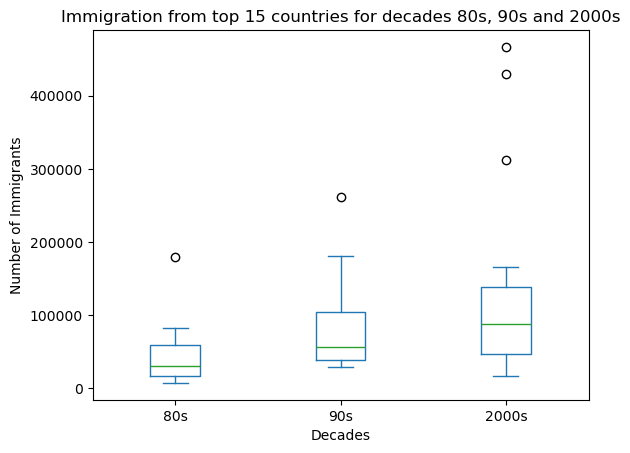

In [129]:
df15[["t80s", "t90s", "t00s"]].plot(kind="box")
plt.title("Immigration from top 15 countries for decades 80s, 90s and 2000s")
plt.xticks(ticks=[1, 2, 3], labels=["80s", "90s", "2000s"])
plt.xlabel("Decades")
plt.ylabel("Number of Immigrants")

plt.show()

## Scatter Plot

In [144]:
df_total = pd.DataFrame(df[years].sum(axis=0))
df_total.reset_index(inplace=True)
df_total.columns = ["year", "population"]
df_total["year"] = df_total["year"].astype("int64")
df_total.head()

year  population
0  1980       99137
1  1981      110563
2  1982      104271
3  1983       75550
4  1984       73417

<Axes: xlabel='year', ylabel='population'>

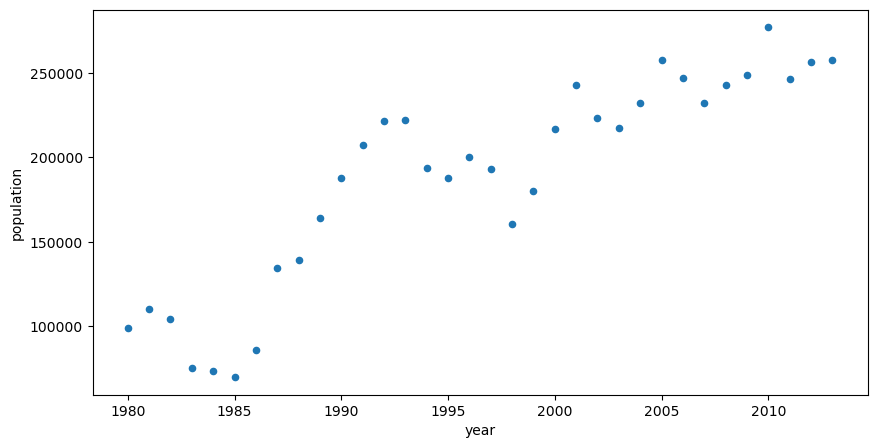

In [146]:
df_total.plot(kind="scatter", x="year", y="population", figsize=(10,5))

In [154]:
lr = LinearRegression()
lr.fit(df_total[["year"]], df_total["population"])
lr.score(df_total[["year"]], df_total["population"])

0.8044281199537422

In [171]:
a = np.arange(2015,2016).reshape(-1,1)
a_df = pd.DataFrame(a, columns=["year"])
b = lr.predict(a_df)
b

array([291495.70725745])

## Bubble Plot

In [183]:
df_t = df[years].T
df_t.reset_index(inplace=True)
df_t.rename(columns={"index": "year"}, inplace=True)
df_t["year"] = df_t["year"].astype("int64")

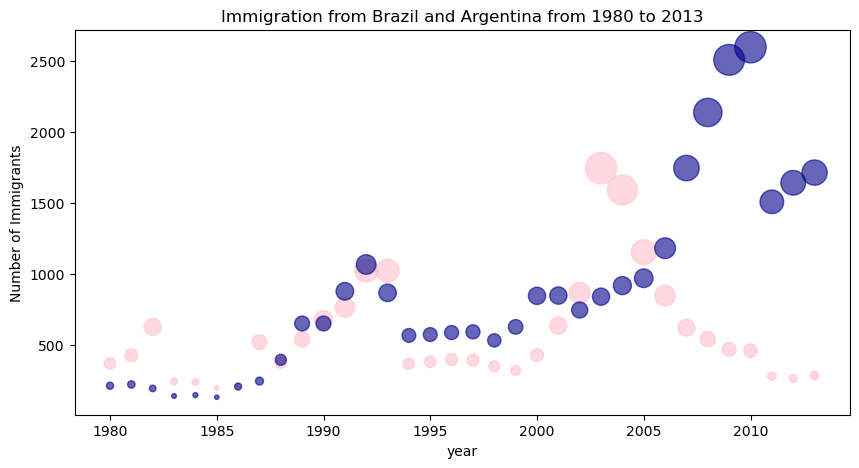

In [198]:
n_Arg = (df_t["Argentina"]-df_t["Argentina"].min())/ (df_t["Argentina"].max()-df_t["Argentina"].min()) 
n_Bra = (df_t["Brazil"]-df_t["Brazil"].min())/ (df_t["Brazil"].max()-df_t["Brazil"].min()) 

ax1 = df_t.plot(kind="scatter", x="year", y="Argentina", s=n_Arg*500+10, color="pink", alpha=0.6, figsize=(10,5))
df_t.plot(kind="scatter", x="year", y="Brazil", s=n_Bra*500+10, color="darkblue", alpha=0.6, ax=ax1)
ax1.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax1.set_ylabel("Number of Immigrants")
plt.show()

## Subplots

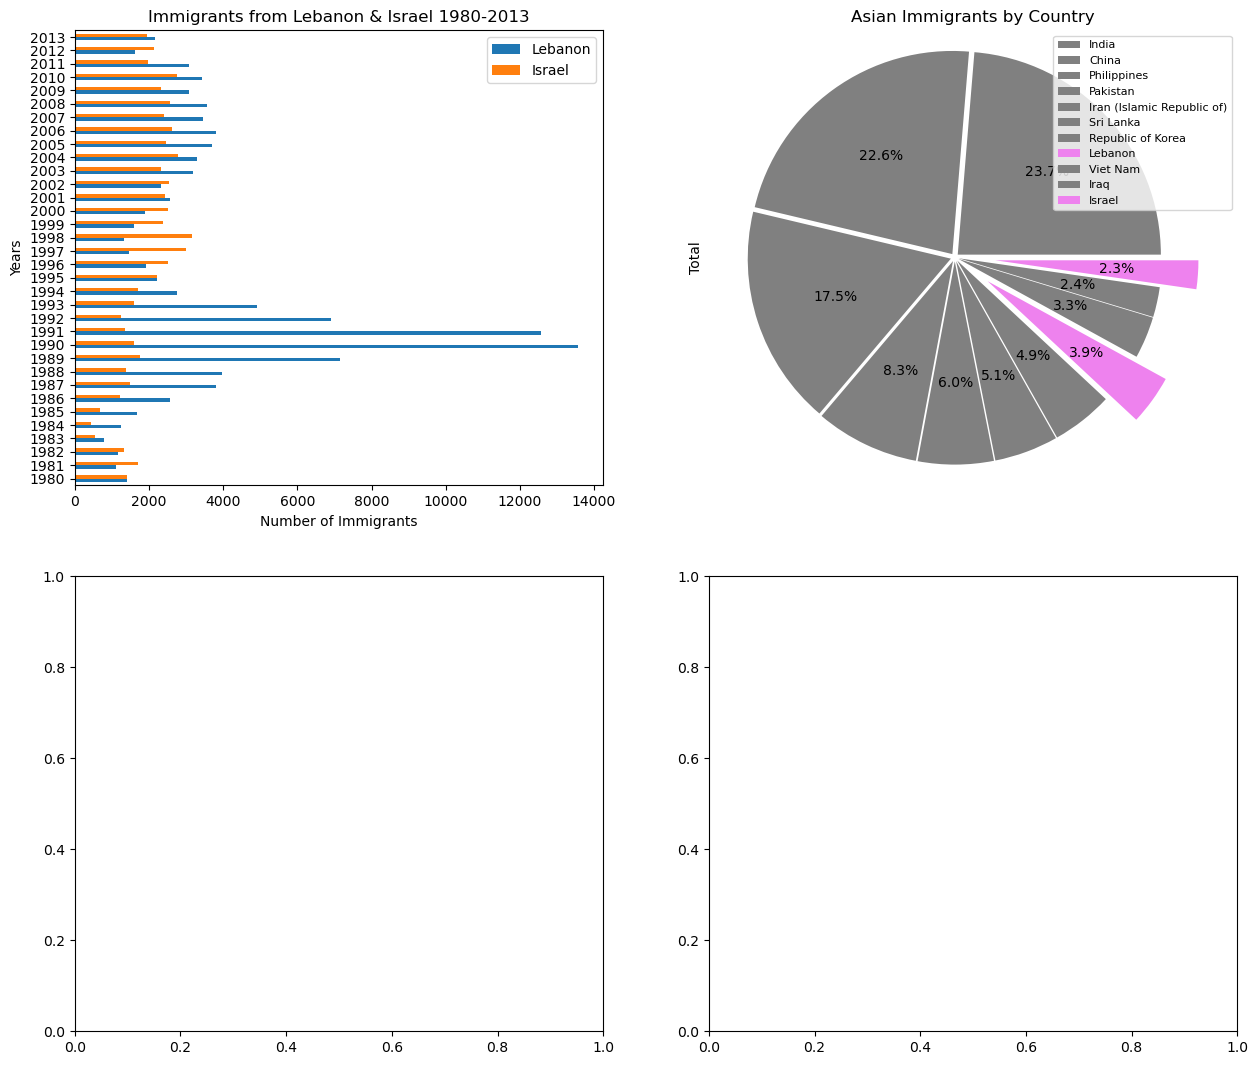

In [107]:
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(224)

df_IL = df.loc[["Lebanon", "Israel"]]

# plt1
df_IL[years].T.plot(kind="barh", ax=ax1, figsize=(15,13))
ax1.set_title("Immigrants from Lebanon & Israel 1980-2013")
ax1.set_ylabel("Years")
ax1.set_xlabel("Number of Immigrants")

# plt2
c = ["grey","grey","grey","grey","grey","grey","grey","violet","grey","grey","violet"]
ex = [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.2,0.02,0.02,0.2]
df_asia_top = df_asia[df_asia["Total"]>66000]
df_asia_top["Total"].plot(kind="pie", autopct='%1.1f%%', ax=ax2, labels=None, figsize=(15, 13), colors=c, explode=ex)
ax2.legend(labels=df_asia_top["index"], loc="best", fontsize=8)
ax2.set_title("Asian Immigrants by Country")
ax2.axis("equal")

# plt3


#plt4


plt.show()